![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

# Additional Topics: Colorbars

---

## Learning Objectives
- Learning more about colorbars in matplotlib
- Creating a plot with a shared colorbar
- Creating a custom colorbar

## Prerequisites


| Concepts | Importance |
| --- | --- |
| Basic familiarity with NumPy | Necessary |
| Basic familiarity with Matplotlib | Necessary |

- **Time to learn**: *10-15 minutes*


---

## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Learning a little about colormaps

### Classes of colormaps

1. **Sequential:** change in lightness and/or saturation of color incrementally. Good for data that has ordering
![Perceptually Sequential](../images/perceptually-sequential.png)
![Sequential](../images/sequential.png)
![Sequential2](../images/sequential2.png)

![Perceptually Sequential](../images/ps.png)
![Sequential](../images/s1.png)
![Sequential2](../images/s2.png)

1. **Diverging:** change in lightness and/or saturation of two different colors that meet in the middle at an unsaturated color. Should be used when the data has a natural zero point, such as sea level.
![Diverging](../images/diverging.png)
![Diverging](../images/d.png)

1. **Cyclic:** change in lightness of two different colors that meet in the middle and begin and end at an unsaturated color. Should be used for values that naturally wrap around.
![Cyclic](../images/cyclic.png)
![Cyclic](../images/c.png)

1. **Qualitative:** miscellaneous color. Should not be used for data that has ordering or relationships
![Qualitative](../images/qualitative.png)
![Miscellanous](../images/misc.png)
![Miscellanous](../images/m.png)

### Other considerations:

There is a lot of info about choosing colormaps that could be it's own tutorial. The most important things that I've come across is two things:
1. Color blind friendly patterns: avoiding colormaps with both red and green can account for the most common form of color blindness. The GeoCAT-examples gallery has a section devoted to picking better colormaps [here](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#colors) that covers this.

1. Grayscale conversion: It is not uncommon for plots rendered in color to be printed in black and white, obscuring the usefulness of a chosen colormap

![hsv colormap in grayscale](../images/hsv2gray.png)

- See [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for a more in depth version of this section

## Basic Colorbar

In [2]:
npts = 1000
nbins = 15

x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

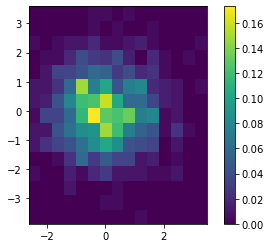

In [7]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True)
plt.colorbar()
ax.set_aspect('equal')

## Shared colorbar

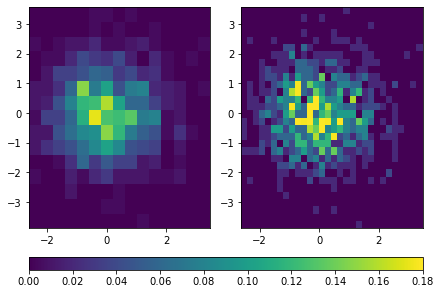

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, vmax=0.18)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, vmax=0.18)
plt.setp(ax, aspect='equal')

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

## Custom colorbar

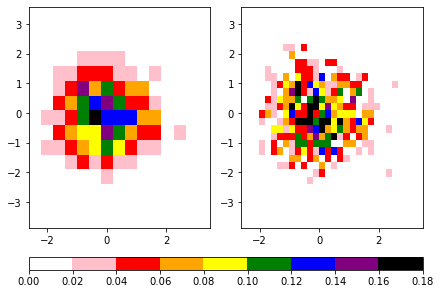

In [5]:
from matplotlib.colors import Normalize, ListedColormap

colors = ['white','pink','red','orange','yellow','green','blue','purple','black']
ccmap = ListedColormap(colors)
norm = Normalize(vmin=0, vmax=0.18)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=ccmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=ccmap, norm=norm)
plt.setp(ax, aspect='equal')

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

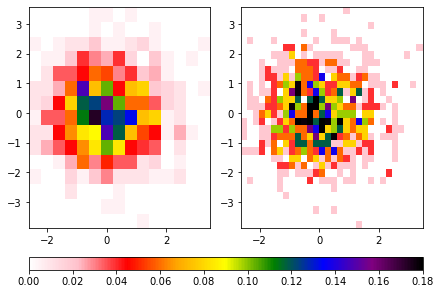

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cbcmap = LinearSegmentedColormap.from_list("cbcmap", colors)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)
plt.setp(ax, aspect='equal')

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

---

## Additional Resources
- [Plot Types Cheat Sheet](https://lnkd.in/dD5fE8V)
- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Making custom colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)